In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

In [2]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}


In [3]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [4]:
# Year vs win probability
x_past = np.linspace(200, 2020, 50)
x_future = np.arange(2022, 2500)
x_full = np.hstack([x_past, [2021], x_future])
xx = np.hstack([x_past, [2021]])

yy = np.ones_like(xx) * 0.5
yy[-1] = 1

<IPython.core.display.Javascript object>

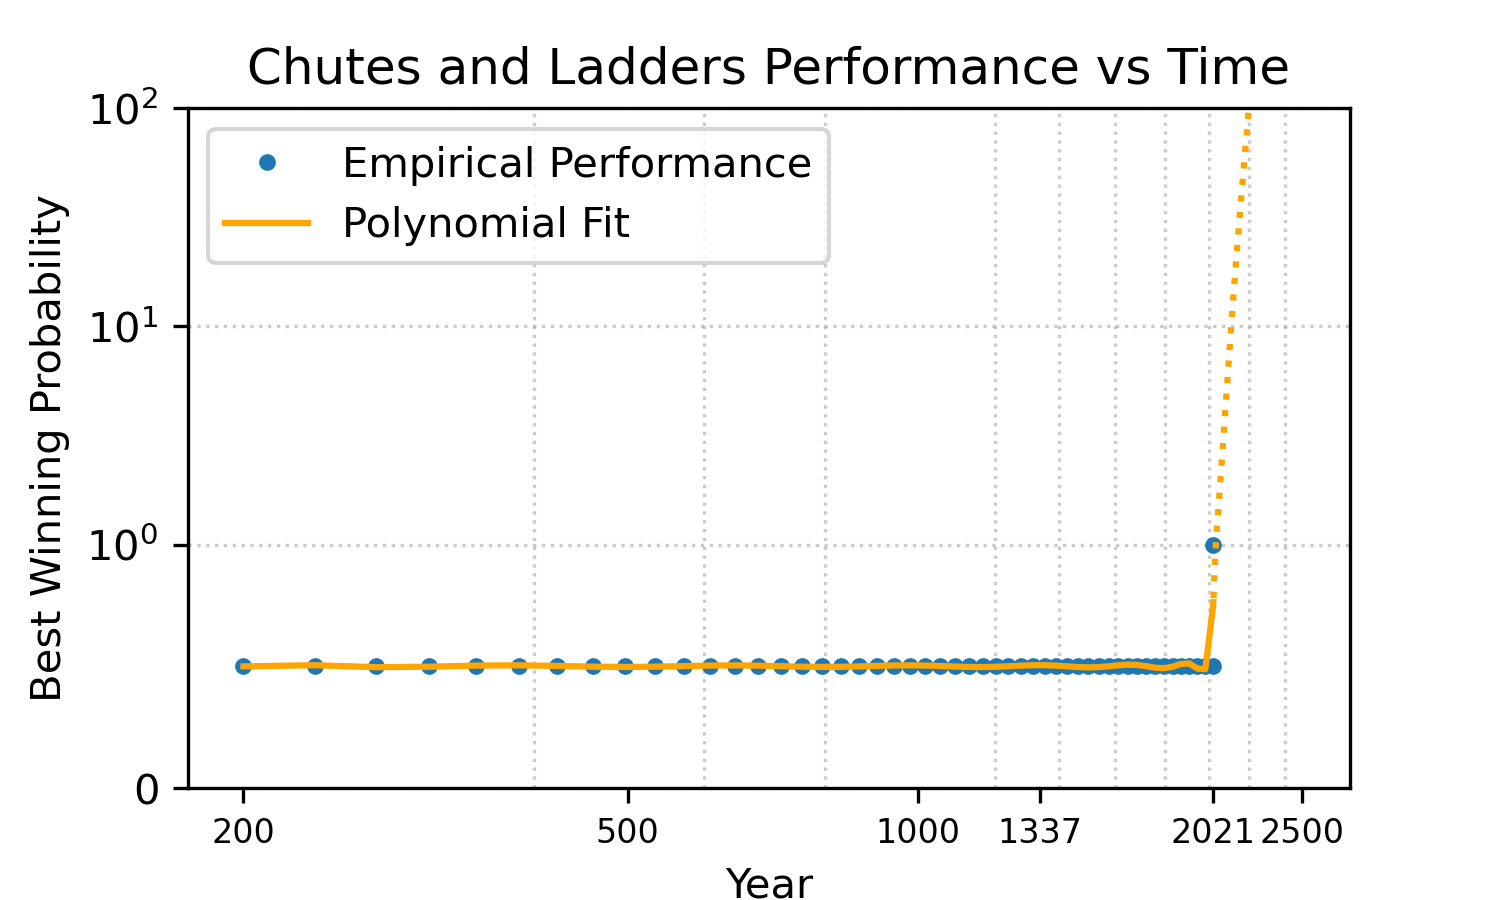

<IPython.core.display.Javascript object>

In [5]:
# calculate polynomial
z = np.polyfit(xx, yy, 15)
f = np.poly1d(z)

# interpolate/extrapolate
y_full = f(x_full)
y_hat = f(xx)

# Plot
fig, ax = plt.subplots(figsize=(5, 3), dpi=300)
ax.plot(xx, yy, "o", linestyle="none", markersize=3, label="Empirical Performance")
ax.plot(xx, y_hat, label="Polynomial Fit", color="orange")
ax.plot(x_future, f(x_future), color="orange", linestyle=":")

# Customization
ax.set_xscale("symlog")
ax.set_yscale("symlog", linthresh=1.0)


# Ticks
xticks = [200, 500, 1000, 1337, 2021, 2500]
ax.set_xticks(xticks)
ax.set_xticklabels(["%d" % y for y in xticks], fontsize=8)

ax.set_xticks(np.arange(200, 2600, 200), minor=True)
ax.tick_params(axis="x", which="minor", length=0)

ax.set_yticks([0, 1, 10, 100], minor=False)

# Gridlines
ax.xaxis.grid(True, which="minor", color="#999999", linestyle=":", alpha=0.5)
ax.yaxis.grid(True, which="major", color="#999999", linestyle=":", alpha=0.5)


# Limits
ax.set_ylim(0, 100)
ax.set_xlim(175, 2800)

# Labels
ax.set_title("Chutes and Ladders Performance vs Time")
ax.set_xlabel("Year", fontsize=10)
ax.set_ylabel("Best Winning Probability", fontsize=10)


# Add legend
ax.legend()

# Save
fig.savefig("performance-vs-time.pdf")